In [1]:
using JuMP, Cbc, NamedArrays

In [ ]:
#Problem 1-1

Decision Variables
xi for i in I [i = 1:11] #1:11 represents alphabet a-k for each task, I represents all tasks

Objective
Minimize Hours required to defeat boss
Min (sum(xi for i in I)) #each letter represents a time of how long it takes to complete a task,
    #we want to minimize this
        
Constraints
B >= A + 2
C >= A + 2
D >= B + C + 1 + 3
E >= D + 2
F >= C + 3
G >= B + 1
H >= E + G + 4 + 2
I >= D + H + 2 + 3
J >= F + I + 5 + 4
K >= J + 6

In [2]:
#Problem 1-2
using JuMP, Cbc, NamedArrays
m = Model()

#data
quests = Dict(
    :A => (duration = 2, predecessors = []),
    :B => (duration = 1, predecessors = [:A]),
    :C => (duration = 3, predecessors = [:A]),
    :D => (duration = 2, predecessors = [:B, :C]),
    :E => (duration = 4, predecessors = [:D]),
    :F => (duration = 5, predecessors = [:C]),
    :G => (duration = 2, predecessors = [:B]),
    :H => (duration = 3, predecessors = [:E, :G]),
    :I => (duration = 4, predecessors = [:D, :H]),
    :J => (duration = 6, predecessors = [:F, :I]),
    :K => (duration = 5, predecessors = [:J])
)

#Decision Variables
@variable(m, x[q in keys(quests)] >=0)

#Objective
@objective(m, Min, x[:K] + quests[:K].duration)

#Constraints
@constraint(m, [(t,quest) in quests, predecessor in quest.predecessors], x[t] >= x[predecessor] + 
    quests[predecessor].duration)

set_optimizer(m, Cbc.Optimizer)
optimize!(m)



Presolve 0 (-14) rows, 0 (-11) columns and 0 (-28) elements
Optimal - objective value 24
After Postsolve, objective 24, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 24 - 0 iterations time 0.012, Presolve 0.01


In [ ]:
#Problem 1-3
Decision Variable
xi for i in I #start time of quest i in I
ti for i in I #original time before reduction ri in I
ri for i in I #reduction in hour when i is complete
ci for i in I #Spell slot cost for i in I
        
Objective
Minimize spell cost
sum(ri*ci) #amount of time reduced per spell

Constraints
ri <= 2 for all i in I #max time each quest can be reduced by
si >= sj + rj #j being predecessors for each q
s11 + r11 <= 20 #time constraint to finish journey, 11 being letter k which is the final boss
xi, ti, ri, ci >= 0 #non zero constraint


In [3]:
#Problem 1-4
quests =[
    :A,
    :B,
    :C,
    :D,
    :E,
    :F,
    :G,
    :H,
    :I,
    :J,
    :K
]
arc = [(:A,:B),(:A,:C),(:B,:D),(:B,:G), (:C,:D),(:C,:F),(:D,:E),(:D,:I),(:E,:H),(:F,:J),(:G,:H),
    (:H,:I),(:I,:J),(:J,:K)]
duration= Dict(zip(quests, [2,1,3,2,4,5,2,3,4,6,5]))
reduction= Dict(zip(quests, [5,2,3,8,4,9,6,3,4,5,10]))

using JuMP, Cbc, NamedArrays
m = Model()

#variables
@variable(m, x[quests] >=0)
@variable(m, y[quests] >= 0)
@variable(m, z >=0)

#@objective(m, Min, sum(c[i]*y[i] for i in I))
@objective(m, Min, sum(reduction[q]*y[q] for q in quests))


#@constraint(m, max_i[i in I], z >= x[i] + a[i] - y[i])
# Constraints
@constraint(m, max[q in quests], z >= x[q]+ duration[q] - y[q])
@constraint(m, spell[(q,r) in arc], x[r]>= x[q]+duration[q]-y[q])
@constraint(m, crash_max[q in quests], y[q] <= 2)
@constraint(m, z_max, z <= 20)

set_optimizer(m, Cbc.Optimizer)
optimize!(m)

Presolve 23 (-14) rows, 20 (-3) columns and 58 (-29) elements
0  Obj 0 Primal inf 17.299991 (10)
12  Obj 33
Optimal - objective value 33
After Postsolve, objective 33, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 33 - 12 iterations time 0.012, Presolve 0.00


Problem 2-1
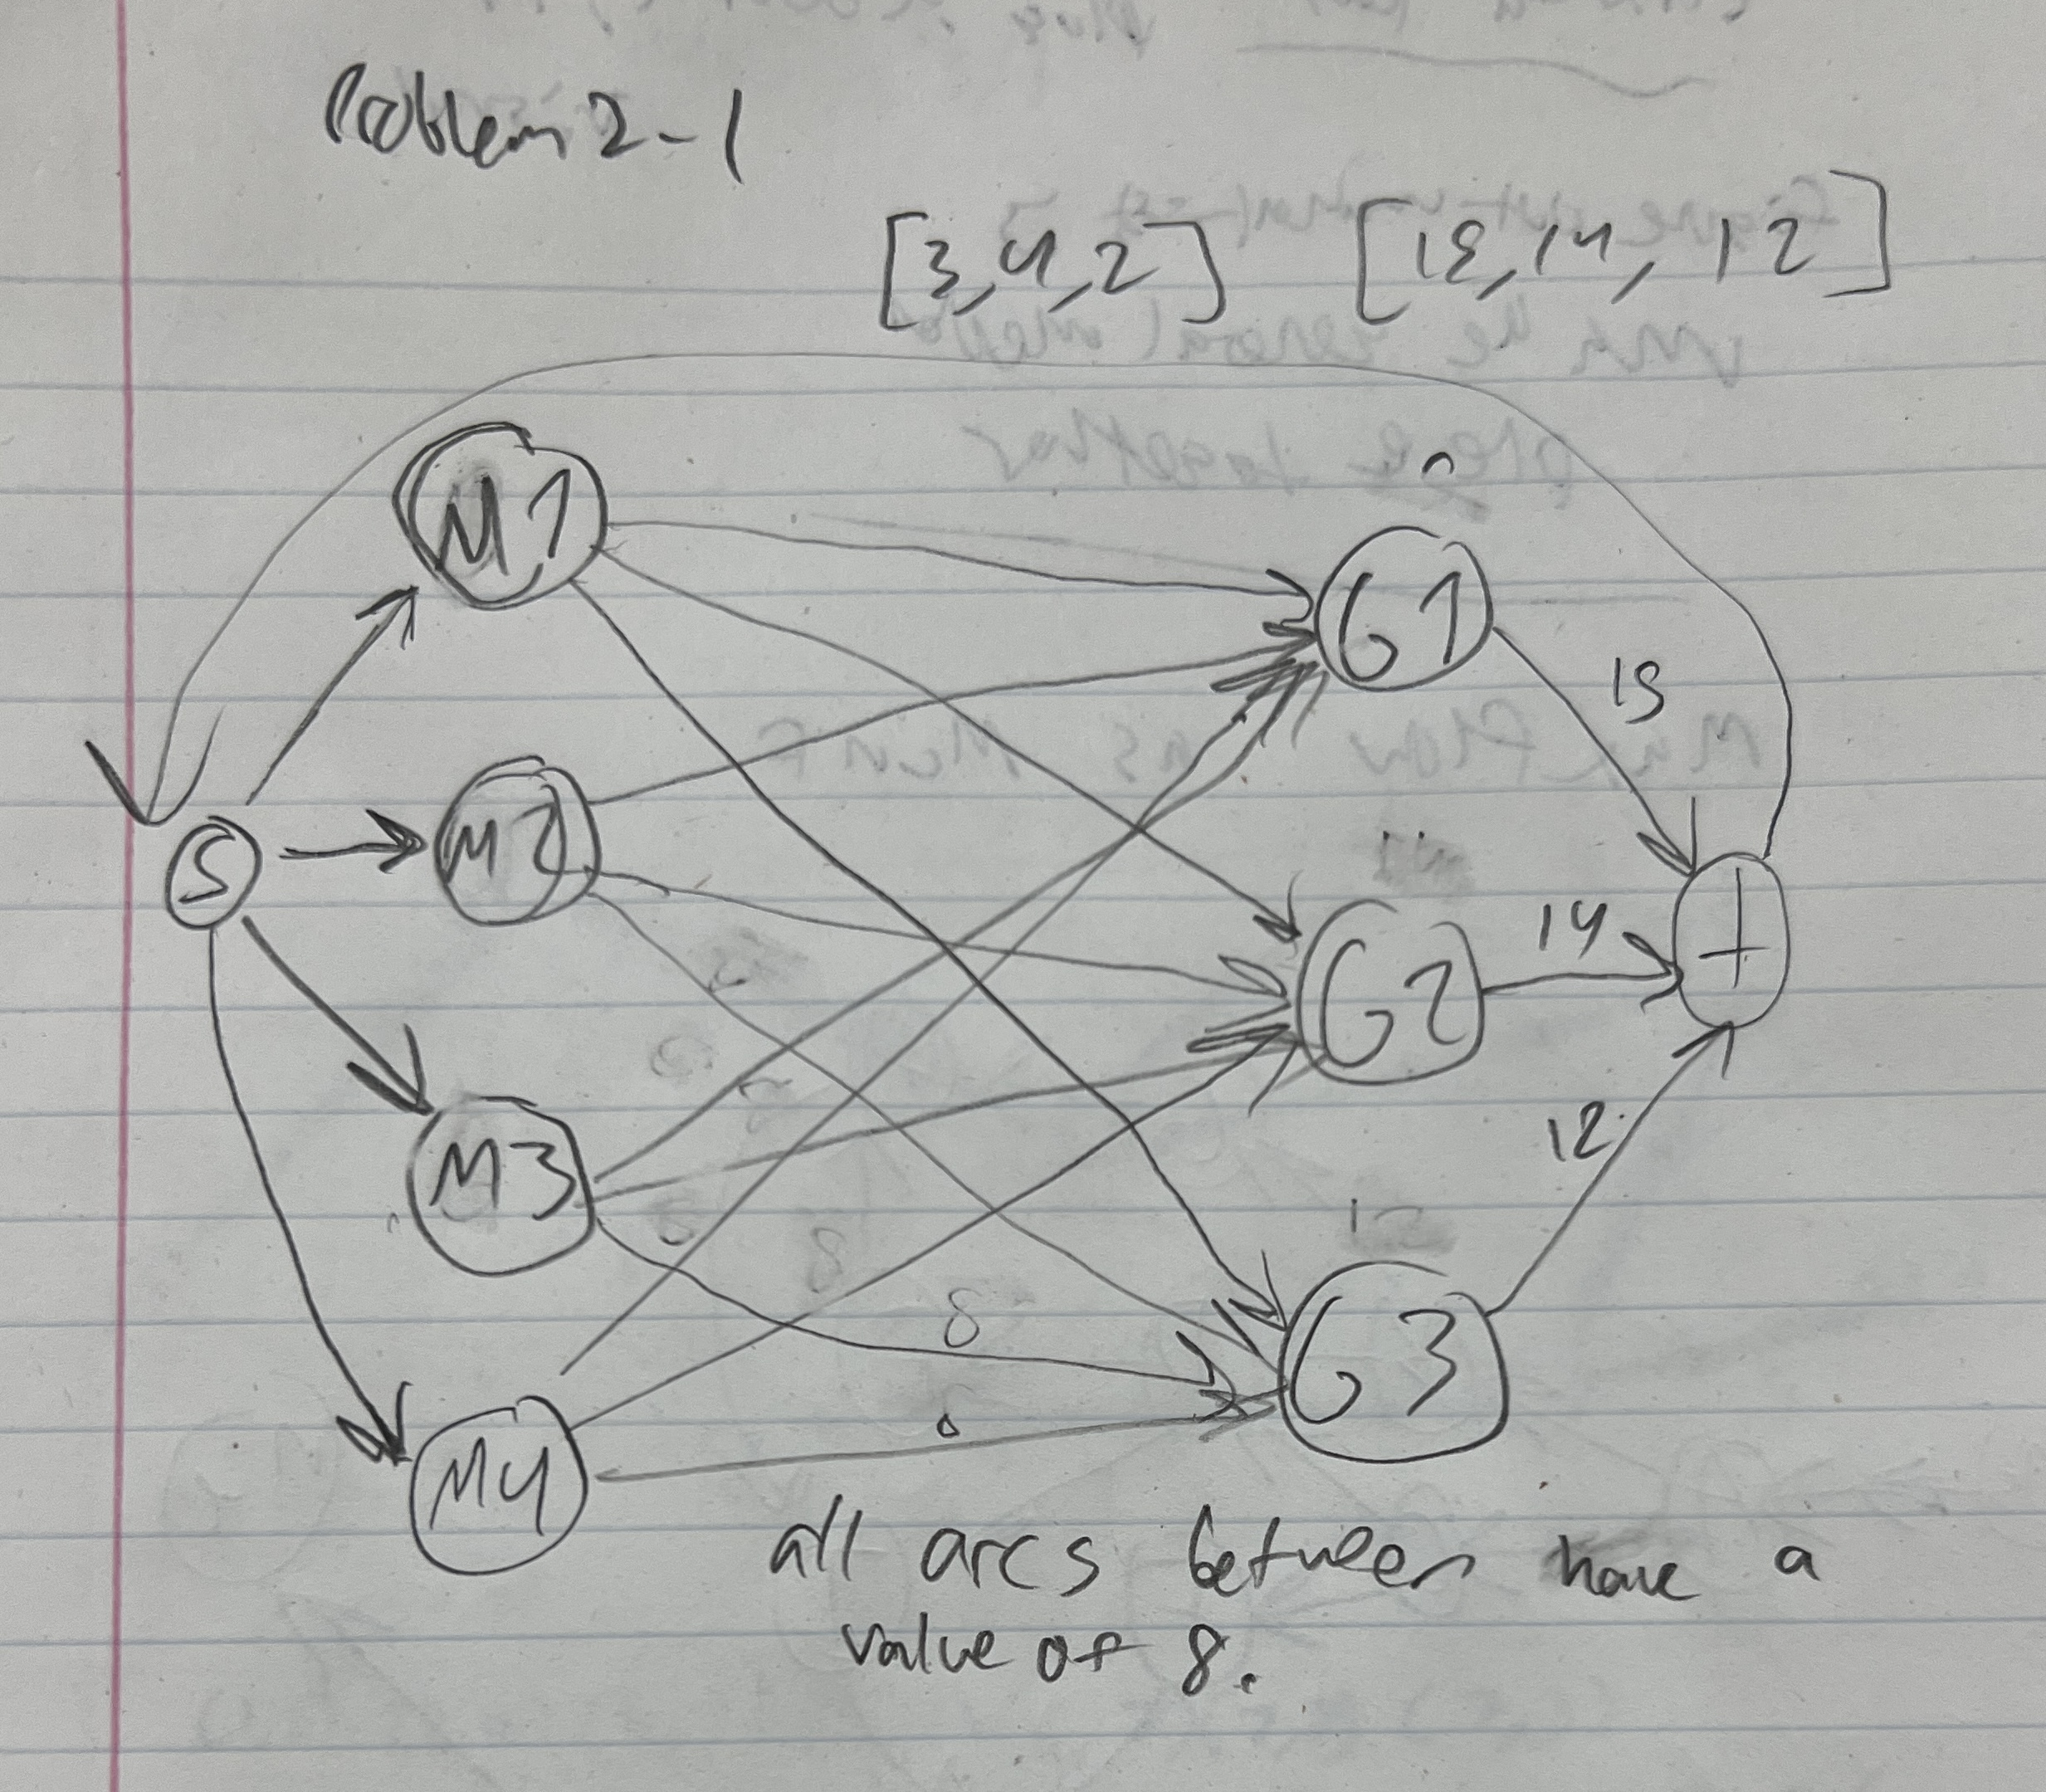

In [1]:
#Problem 2-2

campaigns = 1:3
months = 1:4
hours_required = [15,14,12]
hours_avaliable = 12
using JuMP, Cbc, NamedArrays
m = Model()

@variable(m, x[campaigns, months] >=0)

@objective(m, Min, sum(x))

@constraint(m, [c in campaigns], sum(x[c, z] for z in months) 
== hours_required[c])
@constraint(m, [z in months], sum(x[c, z] for c in campaigns) 
<= hours_avaliable)
@constraint(m, [z in months, c in campaigns], x[c, z] <=8)
 

set_optimizer(m, Cbc.Optimizer)
optimize!(m)

Presolve 7 (-12) rows, 12 (0) columns and 24 (-12) elements
Perturbing problem by 0.001% of 1 - largest nonzero change 5.1174564e-05 ( 0.0051174564%) - largest zero change 0
0  Obj 0 Primal inf 40.999997 (3)
5  Obj 41.001565
Optimal - objective value 41
After Postsolve, objective 41, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 41 - 5 iterations time 0.002, Presolve 0.00


Problem 2-3
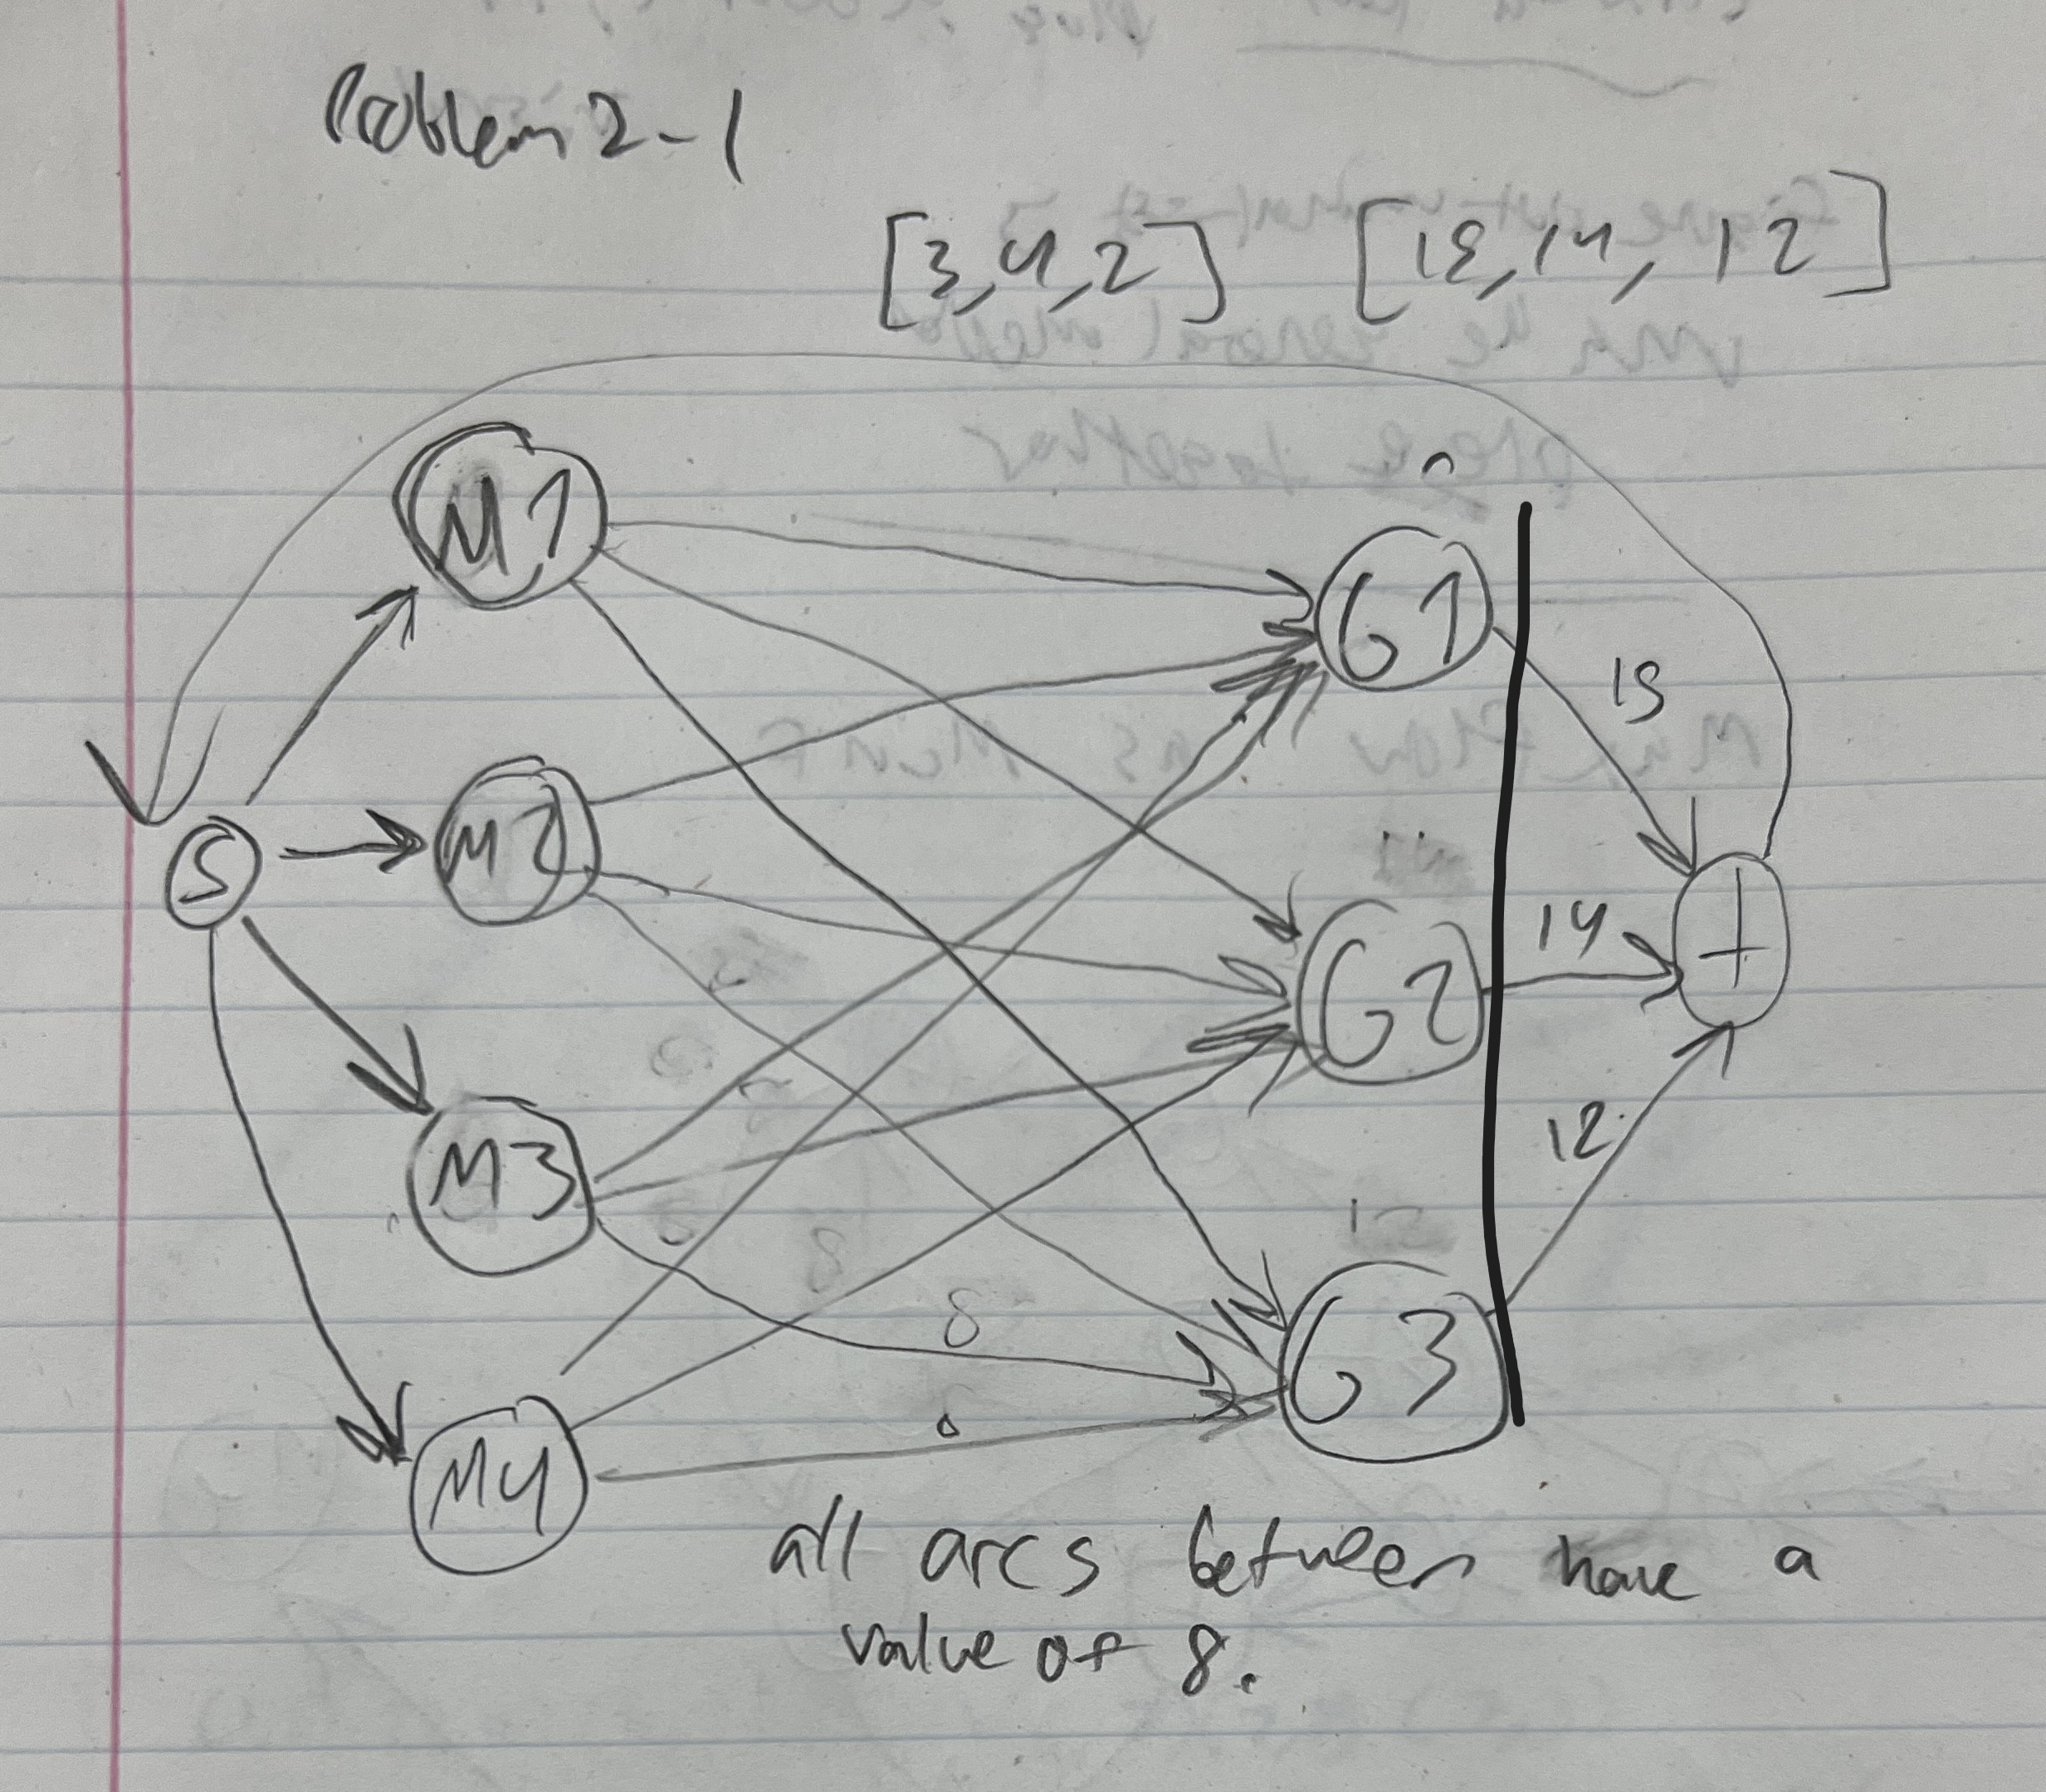
CUT AT THE LINE, ADD THE VALUE OF ARCS THAT ARE CUT AT NODE t, AND WE GET 15 + 14 + 12 WHICH = 41, WHICH IS OUR MINIMUM CAPACITY IN THIS NETWORK

PROBLEM 3-1
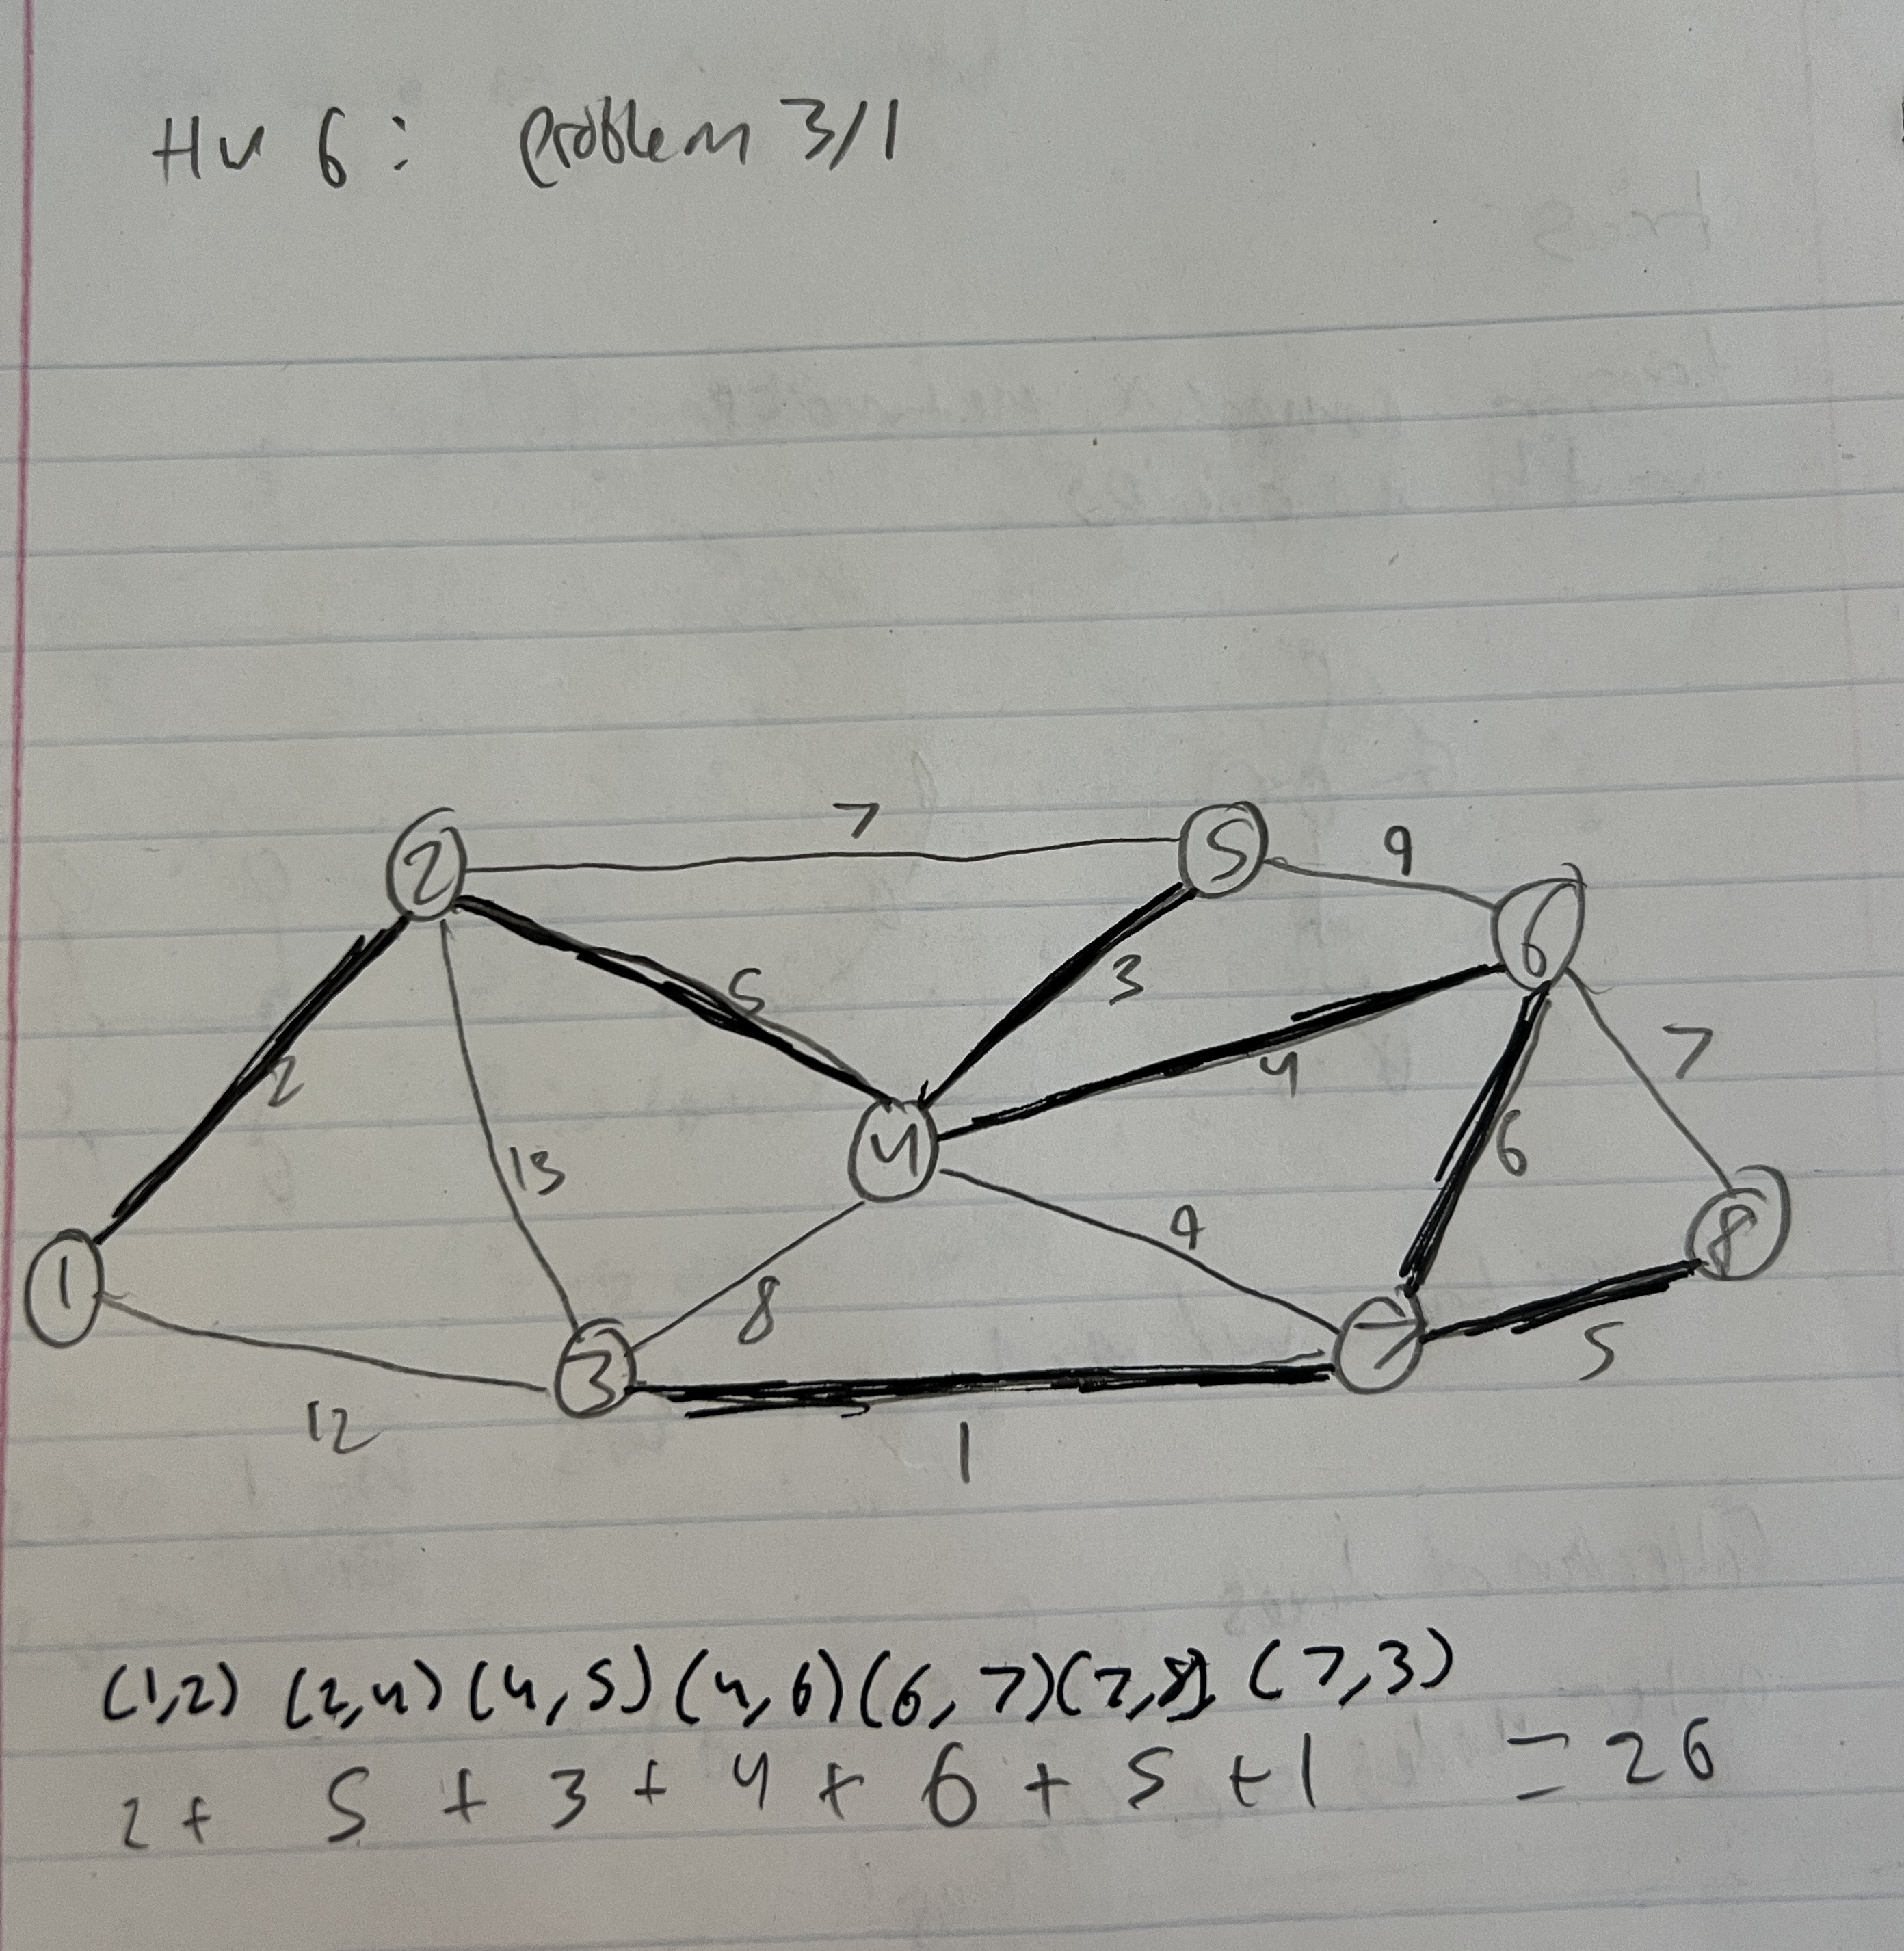

TOTAL COST = 26